<a href="https://colab.research.google.com/github/dianekolodny/DataScience/blob/main/Pubmed_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [55]:
!pip install matplotlib
!pip install adjustText
!pip install mplcursors
!pip install mpldatacursor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Fetch journal articles from PubMed using search terms

In [90]:
import requests
import xml.etree.ElementTree as ET

def fetch_article_details(article_id):
    base_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi'
    params = {
        'db': 'pubmed',
        'retmode': 'xml',
        'id': article_id
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.content
    else:
        print(f'Failed to retrieve article details for ID: {article_id}')
        return None

def parse_article_details(xml_data):
    root = ET.fromstring(xml_data)
    author_elements = root.findall('.//Author')
    authors = []
    affiliations = []
    for author_element in author_elements:
        first_name_element = author_element.find('ForeName')
        last_name_element = author_element.find('LastName')
        affiliation_element = author_element.find('.//AffiliationInfo/Affiliation')

        first_name = first_name_element.text if first_name_element is not None else ''
        last_name = last_name_element.text if last_name_element is not None else ''
        full_name = f'{first_name} {last_name}'

        authors.append(full_name)

        affiliation = affiliation_element.text if affiliation_element is not None else ''
        affiliations.append(affiliation)

    title_element = root.find('.//ArticleTitle')
    abstract_element = root.find('.//Abstract/AbstractText')
    pub_date_element = root.find('.//PubDate')
    journal_element = root.find('.//Journal/Title')

    title = title_element.text if title_element is not None else ''
    abstract = abstract_element.text if abstract_element is not None else ''
    pub_date = get_pub_date(pub_date_element) if pub_date_element is not None else ''
    journal = journal_element.text if journal_element is not None else ''

    return {
        'authors': authors,
        'affiliations': affiliations,
        'title': title,
        'abstract': abstract,
        'pub_date': pub_date,
        'journal': journal
    }

def get_pub_date(pub_date_element):
    year_element = pub_date_element.find('.//Year')
    month_element = pub_date_element.find('.//Month')
    day_element = pub_date_element.find('.//Day')

    year = year_element.text if year_element is not None else ''
    month = month_element.text if month_element is not None else ''
    day = day_element.text if day_element is not None else ''

    return f'{year}-{month}-{day}'

# Example usage
search_term = 'immunoproteasome inhibitor'
article_ids = search_pubmed(search_term)

# Create lists to store data
authors_list = []
affiliations_list = []
titles_list = []
abstracts_list = []
pub_dates_list = []
journals_list = []
links_list = []

for article_id in article_ids:
    article_data = fetch_article_details(article_id)
    if article_data:
        parsed_data = parse_article_details(article_data)
        authors = parsed_data.get('authors', [])
        affiliations = parsed_data.get('affiliations', [])
        title = parsed_data.get('title', '')
        abstract = parsed_data.get('abstract', '')
        pub_date = parsed_data.get('pub_date', '')
        journal = parsed_data.get('journal', '')

        authors_str = ', '.join(authors)
        affiliations_str = '\n'.join(affiliations)

        pubmed_link = f'https://pubmed.ncbi.nlm.nih.gov/{article_id}'

        authors_list.append(authors_str)
        affiliations_list.append(affiliations_str)
        titles_list.append(title)
        abstracts_list.append(abstract)
        pub_dates_list.append(pub_date)
        journals_list.append(journal)
        links_list.append(pubmed_link)

# Create a data frame
df = pd.DataFrame({
    'Authors': authors_list,
    'Affiliations': affiliations_list,
    'Title': titles_list,
    'Abstract': abstracts_list,
    'Publication Date': pub_dates_list,
    'Journal': journals_list,
    'Link': links_list
})

# Save the data frame as an Excel file
output_file = 'pubmed_results.xlsx'
df.to_excel(output_file, index=False)

print(f"Results saved to {output_file}")

Results saved to pubmed_results.xlsx


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Analysis

## Plotting Authors and Affiliations by Count

<ipython-input-83-2deb4f5002a5>:71: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



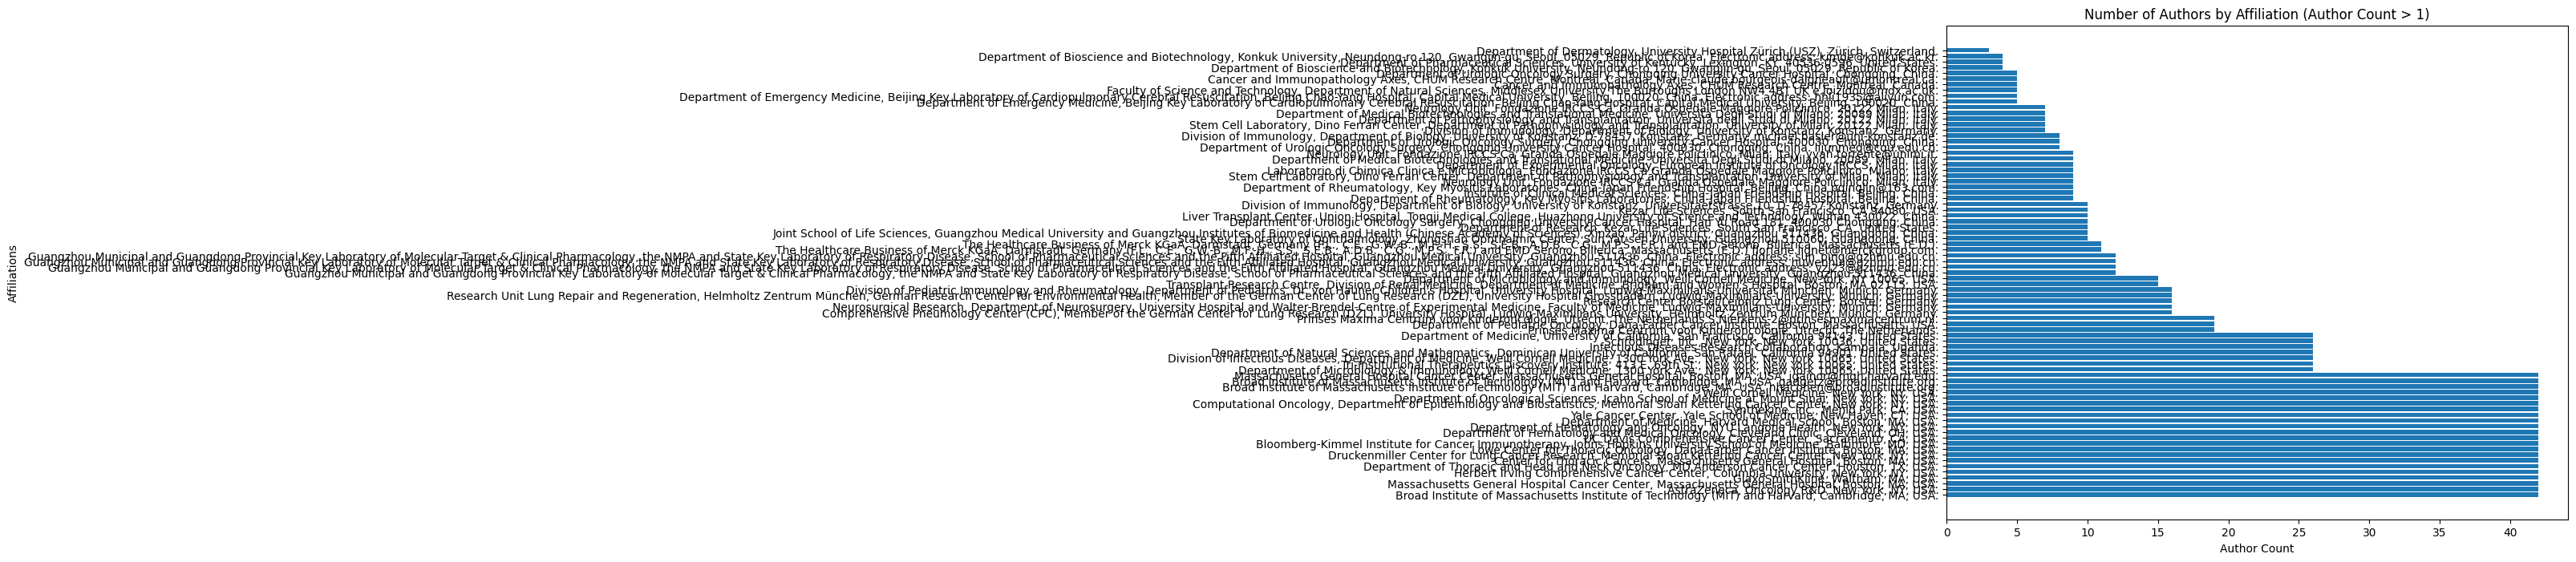

In [83]:
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def fetch_article_details(article_id):
    base_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi'
    params = {
        'db': 'pubmed',
        'retmode': 'xml',
        'id': article_id
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.content
    else:
        print(f'Failed to retrieve article details for ID: {article_id}')
        return None

def parse_article_details(xml_data):
    root = ET.fromstring(xml_data)
    author_elements = root.findall('.//Author')
    authors = []
    affiliations = []
    for author_element in author_elements:
        first_name_element = author_element.find('ForeName')
        last_name_element = author_element.find('LastName')
        affiliation_element = author_element.find('.//AffiliationInfo/Affiliation')

        first_name = first_name_element.text if first_name_element is not None else ''
        last_name = last_name_element.text if last_name_element is not None else ''
        full_name = f'{first_name} {last_name}'

        authors.append(full_name)

        affiliation = affiliation_element.text if affiliation_element is not None else ''
        affiliations.append(affiliation)

    return authors, affiliations

# Example usage
search_term = 'immunoproteasome inhibitor'
article_ids = search_pubmed(search_term)

affiliation_authors = {}

for article_id in article_ids:
    article_data = fetch_article_details(article_id)
    if article_data:
        authors, affiliations = parse_article_details(article_data)
        for affiliation in affiliations:
            if affiliation not in affiliation_authors:
                affiliation_authors[affiliation] = set()
            affiliation_authors[affiliation].update(authors)

# Filter affiliations with author count greater than 1
filtered_affiliations = [affiliation for affiliation, authors in affiliation_authors.items() if len(authors) > 1]
filtered_counts = [len(affiliation_authors[affiliation]) for affiliation in filtered_affiliations]

# Sort affiliations and counts in descending order of author count
sorted_data = sorted(zip(filtered_affiliations, filtered_counts), key=lambda x: x[1], reverse=True)
sorted_affiliations, sorted_counts = zip(*sorted_data)

# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_affiliations)), sorted_counts, align='center')
plt.yticks(range(len(sorted_affiliations)), sorted_affiliations)
plt.xlabel('Author Count')
plt.ylabel('Affiliations')
plt.title('Number of Authors by Affiliation (Author Count > 1)')
plt.tight_layout()
plt.show()


## Dataframe of Authors and Affiliations

In [89]:
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def fetch_article_details(article_id):
    base_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi'
    params = {
        'db': 'pubmed',
        'retmode': 'xml',
        'id': article_id
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.content
    else:
        print(f'Failed to retrieve article details for ID: {article_id}')
        return None

def parse_article_details(xml_data):
    root = ET.fromstring(xml_data)
    author_elements = root.findall('.//Author')
    authors = []
    affiliations = []
    for author_element in author_elements:
        first_name_element = author_element.find('ForeName')
        last_name_element = author_element.find('LastName')
        affiliation_element = author_element.find('.//AffiliationInfo/Affiliation')

        first_name = first_name_element.text if first_name_element is not None else ''
        last_name = last_name_element.text if last_name_element is not None else ''
        full_name = f'{first_name} {last_name}'

        authors.append(full_name)

        affiliation = affiliation_element.text if affiliation_element is not None else ''
        affiliations.append(affiliation)

    return authors, affiliations

# Example usage
search_term = 'immunoproteasome inhibitor'
article_ids = search_pubmed(search_term)

affiliations = []
authors = []

for article_id in article_ids:
    article_data = fetch_article_details(article_id)
    if article_data:
        article_authors, article_affiliations = parse_article_details(article_data)
        affiliations.extend(article_affiliations)
        authors.extend(article_authors)

# Create a data frame to store authors and affiliations
df = pd.DataFrame({'Authors': authors, 'Affiliation': affiliations})

# Display the data frame
df


,Authors,Affiliation
0,Amrendra K Ajay,"Transplant Research Centre, Division of Renal ..."
1,Philip Chu,"Transplant Research Centre, Division of Renal ..."
2,Poojan Patel,"Transplant Research Centre, Division of Renal ..."
3,Christa Deban,"Transplant Research Centre, Division of Renal ..."
4,Chitran Roychowdhury,"Transplant Research Centre, Division of Renal ..."
...,...,...
226,Felix Rohdich,"The Healthcare Business of Merck KGaA, Darmsta..."
227,Boran Yoon,"Department of Bioscience and Biotechnology, Ko..."
228,Yewon Yun,"Department of Bioscience and Biotechnology, Ko..."
229,Kyung Bo Kim,"Department of Pharmaceutical Sciences, Univers..."


## K-means Clustering of authors and affiliations

In [84]:
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

def fetch_article_details(article_id):
    base_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi'
    params = {
        'db': 'pubmed',
        'retmode': 'xml',
        'id': article_id
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.content
    else:
        print(f'Failed to retrieve article details for ID: {article_id}')
        return None

def parse_article_details(xml_data):
    root = ET.fromstring(xml_data)
    author_elements = root.findall('.//Author')
    authors = []
    affiliations = []
    for author_element in author_elements:
        first_name_element = author_element.find('ForeName')
        last_name_element = author_element.find('LastName')
        affiliation_element = author_element.find('.//AffiliationInfo/Affiliation')

        first_name = first_name_element.text if first_name_element is not None else ''
        last_name = last_name_element.text if last_name_element is not None else ''
        full_name = f'{first_name} {last_name}'

        authors.append(full_name)

        affiliation = affiliation_element.text if affiliation_element is not None else ''
        affiliations.append(affiliation)

    return authors, affiliations

# Example usage
search_term = 'immunoproteasome inhibitor'
article_ids = search_pubmed(search_term)

affiliation_authors = {}

for article_id in article_ids:
    article_data = fetch_article_details(article_id)
    if article_data:
        authors, affiliations = parse_article_details(article_data)
        for affiliation in affiliations:
            if affiliation not in affiliation_authors:
                affiliation_authors[affiliation] = []
            affiliation_authors[affiliation].extend(authors)

# Prepare data for clustering
affiliations = list(affiliation_authors.keys())
authors = list(affiliation_authors.values())

# Vectorize the affiliations using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(affiliations)

# Apply dimensionality reduction
svd = TruncatedSVD(n_components=2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_lsa)
labels = kmeans.labels_

# Create a hover template with affiliation and author list
hover_template = '<b>Affiliation:</b> %{text}<br><br><b>Authors:</b><br><div style="max-height:200px;overflow:auto;">%{customdata}</div>'
custom_data = ['<br>'.join(authors) for authors in authors]

# Create a scatter plot using Plotly
fig = go.Figure(data=go.Scatter(
    x=X_lsa[:, 0],
    y=X_lsa[:, 1],
    mode='markers',
    marker=dict(
        color=labels,
        colorscale='viridis',
        size=8,
        line_width=1,
    ),
    hovertemplate=hover_template,
    text=affiliations,
    customdata=custom_data,
))

fig.update_layout(
    title='Clustering Map of Authors by Affiliation',
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    coloraxis_colorbar=dict(
        title='Cluster',
    ),
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Dataframe of Clusters - Authors and Affiliations

In [85]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


# Create hover template with affiliation and author list
hover_template = '<b>Affiliation:</b> %{text}<br><br><b>Authors:</b><br><div style="max-height:200px;overflow:auto;">%{customdata}</div>'

# Create a data frame to store authors and affiliations
df = pd.DataFrame({'Affiliation': affiliations, 'Authors': authors})

# Add clustering labels to the data frame
df['Cluster'] = labels

# Display the data frame
df


,Affiliation,Authors,Cluster
0,"Transplant Research Centre, Division of Renal ...","[Amrendra K Ajay, Philip Chu, Poojan Patel, Ch...",4
1,"Department of Microbiology and Immunology, Wei...","[Amrendra K Ajay, Philip Chu, Poojan Patel, Ch...",1
2,"Department of Emergency Medicine, Beijing Key ...","[Kai-Na Shi, Pang-Bo Li, Hui-Xiang Su, Jing Ga...",2
3,"Department of Emergency Medicine, Beijing Key ...","[Kai-Na Shi, Pang-Bo Li, Hui-Xiang Su, Jing Ga...",2
4,"State Key Laboratory of Ophthalmology, Zhongsh...","[Jianing Zhang, Wanhong Li, Zhen Xiong, Juanhu...",2
...,...,...,...
74,"The Healthcare Business of Merck KGaA, Darmsta...","[Floriane Lignet, Christina Esdar, Gina Walter...",3
75,"The Healthcare Business of Merck KGaA, Darmsta...","[Floriane Lignet, Christina Esdar, Gina Walter...",3
76,"Department of Bioscience and Biotechnology, Ko...","[Boran Yoon, Yewon Yun, Kyung Bo Kim, Dong-Eun...",3
77,"Department of Pharmaceutical Sciences, Univers...","[Boran Yoon, Yewon Yun, Kyung Bo Kim, Dong-Eun...",0
